In [1]:
# Ridge regularization also L2 is an extension to linear regression 
# that introduces a regularization term to reduce model complexity and help prevent overfitting
# working value / Magnitude of coefs is almost zero.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv('houseprices.csv')
dataset.head(3)

,Price,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1


In [5]:
x= dataset.drop(columns = ['Price'])
y= dataset['Price']

In [6]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns = x.columns)
x

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,0.272473,-1.431707,-0.244539,1.839752,3.008204,-1.207372
1,-0.204791,-0.652197,-0.244539,-0.243830,-0.403080,0.828245
2,-0.176717,0.127313,-0.244539,0.502144,-0.374414,0.828245
3,-0.011390,-1.431707,-1.578038,-0.115214,0.600239,0.828245
4,0.437800,-1.431707,-0.244539,1.633966,0.026914,0.828245
...,...,...,...,...,...,...
1042,-0.008271,0.127313,1.088961,0.515005,0.800903,0.828245
1043,2.232999,2.465842,1.088961,2.482833,-0.775741,0.828245
1044,-0.572877,0.127313,-1.578038,0.051987,1.087565,0.828245
1045,0.347338,0.906822,-0.244539,0.553590,-0.718409,0.828245


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [9]:
ri = Ridge(alpha = 10)
ri.fit(x_train, y_train)
ri.score(x_test, y_test) * 100

64.711642199859

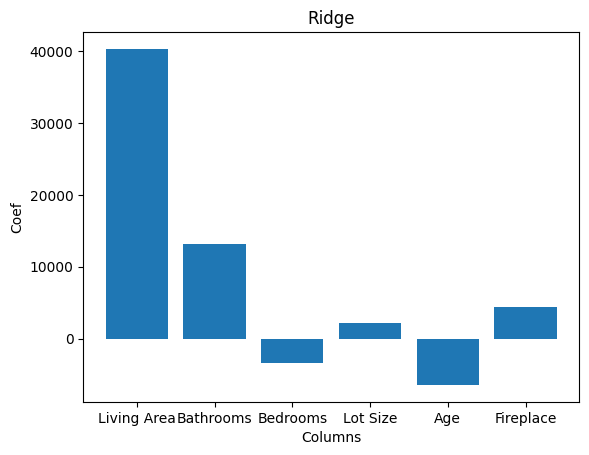

In [10]:
plt.bar(x.columns, ri.coef_)
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('Coef')
plt.show()

In [11]:
# for Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
print(mean_squared_error(y_test, ri.predict(x_test)))
print(mean_absolute_error(y_test, ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))  # root mse

1741451575.347286
28751.909567060462
41730.70302963138
